# Lecture 1

---
### Exercise: Selection Sort
Write the function ```SelectionSort(coll)``` that returns a sorted list with the elements in *coll*. 
You have to implements Selection Sort algorithm.

In [ ]:
## Your implementation here!!!

def SelectionSort(coll):
    # collection to array
    A = list(coll)
    
    for i in range(len(A)-1):
        min_idx = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_idx]:
                min_idx = j
        A[i], A[min_idx] = A[min_idx], A[i]
        
    return A

----
### Exercise: Insertion Sort
Write the function ```InsertionSort(coll)``` that returns a sorted list with the elements in *coll*. 
You have to implements Insertion Sort algorithm.

In [ ]:
## Your implementation here!!!



def InsertionSort(coll):
    
    A = list(coll)
    
    for i in range(1, len(A)):
        key = A[i]
        j=i-1
        while j>=0 and A[j]>key:
            A[j+1] = A[j] 
            j-=1
        A[j+1] = key
        
    return A

----
### Exercise: Strange orderings
Given a list, write and test comparators to obtain the following orderings:
- Even number precede odd ones. Even numbers are sorted in non-decreasing  order while odd ones are sorted in non-increasing order.
- Strings are sorted in non-increasing order based on their lengths. Strings having the same length are sorted in non-increasing lexicographic order. 

In [9]:
## Your implementation here!!!

def cmp1(a,b):
    
    if b%2 == 0:
        return 1 #even num in increasing order
    else:
        return -1 #odd number in decreasing
    
def cmp2(a, b):
    
    if len(a) != len(b):
        return len(b) - len(a) # non increasing order based on len
    else:                      # non-increasing lexicographic order
        if a < b:
            return 1
        else:
            return -1

In [11]:
import functools



my_list = list(range(10))
my_list2 = ["a", "b", "aba", "cad", "zzzz", "aaaa"]

print(sorted(my_list, key = functools.cmp_to_key(cmp1)))
print(sorted(my_list2, key = functools.cmp_to_key(cmp2)))

[0, 2, 4, 6, 8, 9, 7, 5, 3, 1]
['zzzz', 'aaaa', 'cad', 'aba', 'b', 'a']


-----
### Exercise: Insertion Sort with a comparator
Write the function ```InsertionSort(coll, cmp)``` that returns a sorted list with the elements in *coll* using 
```cmp```as a comparator.

In [12]:
## Your implementation here!!!

def InsertionSort(coll, cmp): 
    
    A = list(coll)
    
    for i in range(1, len(A)): 
        key = A[i]
        j = i - 1
        while j >= 0 and cmp(key, A[j])<0:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = key
        
    return A

In [13]:
def test_sortedness(my_list, cmp):
    return InsertionSort(my_list, cmp) == sorted(my_list, key = functools.cmp_to_key(cmp))

assert test_sortedness(my_list, cmp1), "Must be sorted"
assert test_sortedness(my_list2, cmp2), "Must be sorted"

-----

### Exercise: Intersection of two lists
Write a function ```intersection_slow(l1, l2)``` which returns the intersection of the two lists l1 and l2.

Use the trivial algorithms that runs in $\Theta(|l1|\times|l2|)$. 

In [14]:
## Your implementation here!!!

def intersection_slow(l1, l2):
    
    intersect=[]
    
    for el1 in l1:
        for el2 in l2:
            if el1 == el2:
                intersect.append(el1)
                
    return intersect

In [15]:
## Test here your implementation 

l1 = [3, 5, 1, 2]
l2 = [1, 4, 6, 2]

assert set(intersection_slow(l1, l2)) == set([1, 2]), "Urca"

----
### Exercise: Faster intersection of two lists
Write a function ```intersection(l1, l2)``` which returns the intersection of the two lists l1 and l2.

Assume that both l1 and l2 are sorted!

In [18]:
## Your implementation here!!!


def intersection(l1, l2):
    
    intersect = [] 
    i = 0 #pointer l1
    j = 0 #pointer l2
    
    while i < len(l1) and j < len(l2):  
        if l1[i] == l2[j]: 
            intersect.append(l1[i]) 
            i += 1 #to dx
            j += 1 
        elif l1[i] < l2[j]: 
            i += 1 #to dx on l1
        elif l2[j] < l1[i]: 
            j += 1 #to dx on l2
            
    return intersect

----
### Exercise: You own search engine
You are given a collection of texts and you want to build your own search engine, people at Google are already very scared!

Modern search engines are based on a data structure called *Inverted Index*. 

Each document of the collection is assigned an identifier, starting from 0.
An inverted index stores a list, called *inverted list*, for each term of the collection.
The list for a term *t* contains the identifiers of all the documents containing term *t*. The list is sorted.

For example,

````
C = ["dog cat elephant monkey",  "dog lion tiger", "fish dog dog cat cow"]

````

The list of term *cat* is [0,2], the list of *elephant* is [0].

Given two terms, an AND query reports all the documents containing both terms. For example, 
*query("cat", "dog"), the result is [0, 2].

You goal is to implement a simple search engine. Do the following. 

- Given the collection, build a dictionary that maps each term to its inverted list. Observe that 
each document occurs at most once in each list. 
- Implement a function *query* which answers an AND query. 

In [19]:
## Your implementation here!!!

def build_index(C):
    
    index = {} 
    
    for i in range(len(C)):
        for word in set(C[i].split()):
            if word not in index:
                index[word]=[i]
            else:
                index[word]+=[i]  #concat 
    return index


def query(index, t1, t2):
    if t1 in index and t2 in index: #and query
        return intersection(index[t1], index[t2])     
    

In [20]:

C = ["dog cat elephant monkey",  "dog lion tiger", "fish dog dog cat cow"]

index = build_index(C)
assert query(index, "cat", "dog") == [0, 2], "Urca"

In [21]:
print(index)

{'dog': [0, 1, 2], 'elephant': [0], 'monkey': [0], 'cat': [0, 2], 'tiger': [1], 'lion': [1], 'fish': [2], 'cow': [2]}


----
# Lecture 2
---
### Exercise: Binary Vector
You are given a binary vector, i.e., each element is either 0 or 1. Implements an easy variant of partition to sort the vector.


In [33]:
## Your implementation here!!!

def EasyPartition(A):
    j = 0
    for i in range(len(A)):
        if A[i] == 0:
            A[i], A[j] = A[j], A[i]
            j += 1
    return A

In [35]:
import random 

binary = [random.randint(0,1) for _ in range(20)]
print(binary)
print(EasyPartition(binary))

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]



---
### Exercise: QuickSort
Below an implementation of QuickSort. 

In this exercise you have to:
- Write detailed comments to describe crucial parts of the code below (to prove you have understand it)
- Implement a random selection of the pivot element

In [22]:
## Your implementation here!!!

def partition(A, low, high): #the partition function takes as input the array A, the initial index and the final index of A
    
    pivot = A[high]  
    #the pivot is set as the final element of the array, at index high. This item is the basis for comparison.
    i = low-1  
    #the index i is set to track the already splitted part of the sub_array
  
    for j in range(low, high): #iterate over all A indexes 
        if A[j] <= pivot: #if the item in position j is less than or equal to pivot
            i = i+1 
            #we increase the index of last item in the sub_array with elements <= pivot by one
            A[i], A[j] = A[j], A[i] 
            #we move the jth item to the left in the sub_array of items <= pivot in position i

    A[i+1], A[high] = A[high], A[i+1] 
    # we swap the pivot with the first element of sub_array of items > pivot in order to place it in the right position
    return i+1 
    #return the pivot index
    

def quickSort_rec(A, low, high):
    if low < high: 
        pi = partition(A, low, high) #pivot index
        quickSort_rec(A, low, pi-1) #recursive call for the left part where items are <= A[pi] 
        quickSort_rec(A, pi+1, high) #recursion for the right part where items are > A[pi]
        

def quickSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    quickSort_rec(A, 0, len(A)-1)
    return A

In [23]:
import random

def rand_partition(A, low, high):
    
    pivot = A[random.randint(low,high)] #random selection of pivot
    i = low-1  
  
    for j in range(low, high): 
        if A[j] <= pivot: 
            i = i+1 
            A[i], A[j] = A[j], A[i] 

    A[i+1], pivot = pivot, A[i+1] 
    return i+1 
    
def rand_quickSort_rec(A, low, high):
    if low < high: 
        pi = rand_partition(A, low, high)
        quickSort_rec(A, low, pi-1) 
        quickSort_rec(A, pi+1, high)
        
def rand_quickSort(B):
    A = B[:] 
    quickSort_rec(A, 0, len(A)-1)
    return A

In [36]:

print(quickSort([2, 1, 4, 3,8,34,8,22, 3, 23, 678, 43, 2 , 88, 555]))
print(rand_quickSort([2, 1, 4, 3,8,34,8,22, 3, 23, 678, 43, 2 , 88, 555]))

[1, 2, 2, 3, 3, 4, 8, 8, 22, 23, 34, 43, 88, 555, 678]
[1, 2, 2, 3, 3, 4, 8, 8, 22, 23, 34, 43, 88, 555, 678]


----
### Exercise: Merge Sort
Complete the implementation of Merge Sort by implementing function ```merge()```.

In [46]:
## Your implementation here!!!


def merge(A, l, m, r): 
    
    L, R = A[l : m+1] , A[m+1 : r+1]  #not in-place
    m = len(L)-1 
    r = len(R)-1 #last index of L and R
    
    i=0       #initial index of subarray L
    j=0       #initial index of subarray R
    k = l     #initial index of merged array A
    
    while i<=m and j<=r: #checks if there are items left in the sub_array 
        if L[i] <= R[j]:
            A[k] = L[i]
            i+=1
        else:
            A[k] = R[j]
            j+=1
        k+=1
    
    while i<=m: #
        A[k] = L[i]
        i+=1
        k+=1
        
    while j<=r: #
        A[k] = R[j]
        j+=1
        k+=1
        

def mergeSort_rec(A, l, r): 
    
    if l < r:       
        m = (l+(r-1))//2  # Same as (l+r)//2, but avoids overflow for large l and h 
    
        # Sort first and second halves 
        mergeSort_rec(A, l, m) 
        mergeSort_rec(A, m+1, r) 
        merge(A, l, m, r)
        
        
        
def mergeSort(B):
    
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    mergeSort_rec(A, 0, len(A)-1)
    return A

----
# Lecture 3
----
### Exercise: Activity Selection Problem
Activity selection problem is a problem in which a person has a list of works to do. 

Each of the activities has a starting time and ending time. 

We need to schedule the activities in such a way the person can complete a maximum number of activities. 

Since the timing of the activities  may overlap, so it might not be possible to complete all the activities and thus we need to schedule the activities in such a way that the maximum number of activities can be finished.

In [39]:
## Your implementation here!!!

def actv_selector(A):
    
    optimal_set = []
    
    sort_activity = sorted(activity, key=lambda x:x[1]) #sort based on finish time
    
    i=0 
    optimal_set.append(sort_activity[0]) #append first activity ordered by finish time
    
    for j in range(0,len(sort_activity)):
        
        if sort_activity[i][1]<=sort_activity[j][0]: #compare start time with finish time of jth item with start time of ith item
            
            optimal_set.append(sort_activity[j])
            
            i=j
    
    #print('max number of activities is {}'.format(len(optimal_set)))
    #print('Optimal Path is: ')
    return  optimal_set

In [40]:
activity = [(4,6), (0,2),(1,3), (1,6), (3,4)]
assert actv_selector(activity) == [(0,2),(3,4),(4,6)], 'FAIL'

----
### Exercise: Fractional Knapsack Problem

Your goal: Write a function fractional_knapsack(L,W) which takes a list L of pairs (value, weight) and the capacity  𝑊  and returns maximum possible value we can obtain by selecting items.

In [41]:
## Your implementation here!!!

def fractional_knapsack(L, W):
    
    sorted_L = sorted(L, key = lambda r : r[0]/r[1], reverse=True)
    
    sum_weight = 0
    sum_value = 0
    
    for value, weight in sorted_L:
        
        if (sum_weight + weight) < W:
            sum_value += value
            sum_weight += weight
            
        else:
            residual_weight = W - sum_weight
            sum_weight += residual_weight
            sum_value += (value/weight) * residual_weight
            break
            
    return sum_value

In [42]:
L = [(60, 10), (100, 20), (120, 30)]

assert fractional_knapsack(L, 50) == 240.0, "Fail!"

L = [(30, 5), (40, 10), (45, 15), (77, 22), (90, 25)]

assert fractional_knapsack(L, 60) == 230.0, "Fail!"

assert fractional_knapsack(L, 15) == 70.0,  "Fail!"

assert fractional_knapsack(L, 10) == 50.0,  "Fail!"

----
# Lecture 4

----

### Exercise: K-largest elements of a array

We want to compute the K-largest elements of a array A. 

There are three possible algorithms to solve this problem:


#### Algorithm 1: Sorting
The easiest way to solve this is by sorting the array in decreasing order and reporting the first K elements. 

This algorithm costs $\Theta(n\log n)$ time. 

Implement this algorithm in a function ```k_largest_sort(A, K)```and test its correctness.

#### Algorithm 2: QuickSelect
Implement the QuickSelect algorithm and use it to find the K-largest element E in the array A. Then, scan A again 
to collect the K elements larger than or equal to E. Finally, sort the collected elements.

This algorithm costs $\Theta(n + K\log K)$ time (in expectation). 

Implement this algorithm in a function ```k_largest_quickselect(A, K)```and test its correctness.


#### Algorithm 3: Heap
You have to implement the following faster algorithm as a function ```k_largest(A,K)```.
- Scan the array from left to right and keep a min-heap. The min-heap will contain at most K elements.
- Insert the current element into the heap, if the heap has less than K elements or the current element is larger than the minimum in the heap. If the heap has more than K elements, remove the minimum. 
- Sort the collected elements.

This algorithm runs in $\Theta(n\log K)$ time.

Implement this algorithm in a function ```k_largest_heap(A, K)```and test its correctness.

In [ ]:
### Algorithm 1 goes here

def k_largest_sort(A, K):
    A = sorted(A, reverse = True) #sorted in decreasing order
    return A[0:K]

In [ ]:
### Algorithm 2 goes here

def Partition(A, p, r): #using same partition function of quicksort
    
    pivot = A[r]
    i = p - 1 
    
    for j in range(p, r):
        #non increasing ordering
        if A[j] > pivot: 
            i += 1 
            A[i], A[j] = A[j], A[i]  
    A[i+1], A[r] = A[r], A[i+1]
    return i + 1


def QuickSelect(A, i, p, r):
    if p == r:
        return A[p]
    q = Partition(A, p, r)
    
    k = q - p + 1 # n of element before the pivot element 
    if i == k: #if kth element is the pivot
        return A[q]
    if i < k:
        return QuickSelect(A, i, p, q - 1) #recursive call on left sub_array with respect to pivot
    else:
        return QuickSelect(A, i - k, q + 1, r) #recursive call on right sub_array with respect to pivot
    
def k_largest_quickselect(A, K):
    k_largest = []
    for k in range(1, K + 1):
        el = QuickSelect(A,k, 0, len(A)-1)
        k_largest.append(el)
    return k_largest

In [ ]:
### Algorithm 3 goes here

def k_largest_heap(A,K):
    
    minH = A[:K]
    heapq.heapify(minH) 
    
    for el in A[K:]:
        if el > minH[0]: #root is smallest element
            heapq.heappop(minH) #remove smallest element
            heapq.heappush(minH, el) #insert new greater element
    
    return sorted(minH, reverse=True)

---

### Exercise: compute distinct elements
You are given a list A of elements and you want to obtain the list of distict elements in A.

There are two possible algorithms to do this:

- Use ```list(set(A))```
- Sort A and then scan. Implement this as a function ```distinct(A)``` 

Compare these two approaches by varying the size of the array and the number of distinct elements.

In [43]:
## Your implementation here!!!

def distinct(A):
    dist = []
    A = sorted(A) #it gets the algorithm faster
    for el in A:
        if el not in dist:
            dist.append(el)
    return dist

In [44]:
A = [10, 2, 3, 3, 4, 3, 4]

%timeit distinct(A)
%timeit list(set(A))

963 ns ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
467 ns ± 10.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


---

### Exercise: Pareto frontier of a set of points in 2-D space (aka Skyline problem)
We are given a set $S$ of $n$ 2D points.
A point $(x,y)$ dominates a point $(x',y')$ iff $𝑥'\leq 𝑥$ and $y'\leq 𝑦$. 
Our goal is to find the set $P$ of dominating points in $S$. 
This corresponds to find the Pareto frontier (or, equivalently, the skyline). 

The problem can be solved in $\Theta(n\log n)$ time.

To find $P$ we need to sort points in $S$ by $x$ in descending order, 
and if $x$′𝑠 the same by $y$ in descending order. This takes $\Theta(n\log n)$ time. 
Then, we do the following.

- Include first point in $P$ and remember this point as $𝑇$. 
- Iterates through the point (let $C$ current point):
* if $C$ is dominated by $T$, then skip $C$ and go to next point;
* Otherwise, include $C$ in $P$ and set $𝑇=𝐶$.

This step can be performed in linear time.

Implement the function ```pareto_frontier(S)```, which returns the pareto frontier $P$ of the points in $S$.


In [ ]:
## Your implementation here!!!

def pareto_frontier(S):
    S=sorted(S,key = lambda x: (x[0], x[1]), reverse = True) # sort in descending order x and y
    P = [S[0]] 
    T = P[0]
    for C in S:
        if C[0]>T[0] or C[1]>T[1] : #if C dominates T include C in P, else skip C
            P.append(C)             
            T=C                     
        else:continue
    
    P_sorted = sorted(P, key = lambda x: (x[0], x[1])) #reverse the ordering
    return P_sorted 

----
# Lecture 5
----

### Exercise: Open Addressing with linear probing
Complete the implementation below by implementing ```Lookup```and ```Delete```.

In [ ]:
## Your implementation here!!!

class linear_probing_set:
    
    def __init__(self, size):
        
        self.T = [None]*size
        self.prime = 993319
        self.a = random.randint(2, self.prime-1)
        self.b = random.randint(2, self.prime-1)
        self.n_keys = 0
    
    def insert(self, key): # fix len(T) < self.n_keys if you want
        if self.lookup(key):
            return
        h = self.hash(key)
        while self.T[h] != None and self.T[h] != 'D':
            h += 1
            if h == len(self.T):
                h = 0
        self.T[h] = key
        self.n_keys += 1
    
    # Return True if key is in the set, False otherwise
    def lookup(self, key): 
        h = self.hash(key) #hash function
        while self.T[h] != None: 
            if self.T[h] == key: #if element in position h is key then True else moving pointer to the next hash index
                return True
            else:
                h+=1
        return False
        
    
    def delete(self, key):
        h = self.hash(key)
        while self.T[h] != None: 
            if self.T[h] == key: #if element in position h is key then mark it as D
                self.T[h] = "D" 
                return  #used to exit the function
            else:
                h += 1 
        return False  
    
    
    def hash(self, key):
        return ((self.a*key + self.b) % self.prime) % len(self.T)
    
    def len(self):
        return self.n_keys

----
### Exercise: Hashing with Chains
Complete the implementation below by implementing ```Lookup``` and ```Delete```.

In [ ]:
## Your implementation here!!!

class chaining_set:
    
    def __init__(self, size):
        
        self.T = []
        for _ in range(size):
            self.T.append([])
        ## self.T = [ [] for _ in range(size)]
        ## why not self.T = [ [] ] * size ?
        
        self.prime = 993319
        self.a = random.randint(2, self.prime-1)
        self.b = random.randint(2, self.prime-1)
        self.n_keys = 0
        
    def insert(self, key):
        if self.lookup(key):
            return
        
        h = self.hash(key)
        self.T[h].append( key )
        self.n_keys += 1
    
    # return True if key is in the set, False otherwise
    def lookup(self, key):    
        h = self.hash(key) #hash function
        if key in self.T[h]:
            return True
        return False
    
    def delete(self, key):
        h = self.hash(key)
        for i, el in enumerate(self.T[h]):
            if el == key:
                self.T[h].pop(i) #delete
                return
        return False
            
    def hash(self, key):
        return ((self.a*key + self.b) % self.prime) % len(self.T)
    
    def len(self):
        return self.n_keys

----

### Exercise: Dictionary
Modify the previous code (i.e., Hashing with Chains) to implement a dictionary, i.e., store a value together with each key. 
You need to implement methods:
- ```Insert(key, value)```: insert the key with its value. If the key was already present, change its value;
- ```Delete(key)```: remove the key;
- ```Lookup(key)```: return True if the key is present, False otherwise;
- ```Value(key)```: return the value associated with the key. It returns None, if the key is not present.

I suggest to store pairs (key, value) within the lists.

In [ ]:
## Your implementation here!!!

class dictionary:

    def __init__(self, size):
        
        self.T = []
        self.size = size
        self.n_keys = 0
    
    
    def insert(self,key,value):
        if len(self.T) < self.size:
            if self.lookup == False:
                self.T.append([key,value])
                self.n_keys += 1
                return            
            i = 0
            while i < len(self.T):    #replace value in case key is already present
                if key == self.T[i][0]:
                    self.T[i][1] = value
                    return
                i += 1
        else:
            return "no space left"
        
    
    def delete(self,key):
        if self.lookup(key)==False:
             return
        for pair in self.T:
            if pair[0] == key:
                self.T.remove(pair)
                return
  

    def lookup(self,key):
        for pair in self.T:
            if pair[0] == key:
                return True
        return False
    
    
    def value(self,key):
        if self.lookup(key)==False:
            return 
        for pair in self.T:
            if pair[0] == key:
                return pair[1]
   

---
# Lecture 6

--- 
### Exercise: Implements your own GroupBy

In the rest of your life you are going to use GroupBy implemented in some library, but in this exercise we will implement our own simplified version. 

You are give a list of tuples, all with the same number of components. In our simplified implementation  of a pandas' DataFrame each tuple in the list is a row of the DataFrame. Each component of a tuple is a value of a column.

#### Part I
Our first goal is to implement an index to efficiently group by one of the component in the list. 

We'd like to implement a function ```groupBy(L, id)``` which takes the list of tuples ```L``` and the ```id``` of the component and returns a dictionary. The dictionary is an index very similar to what you implemented for a search engine. 
We have a key for each distinct value in column ```id```. The value of a certain key ```k``` is the list of indexes of all the tuple having value ```k``` in the column ```id```.
This means that, if index ```p``` is in the list of key ```k```, then ```L[p][id] = k```.

For example it we have tuples 

|   | 
|:-|
(1, 5, 11)
(0, 4, 1000)
(1, 2, 11)
(1, 4, 66) 
(0, 3, 99)

The groupBy with id=0 will group by first column.

The index is

|   | 
|:--| 
0: [1, 4]
1: [0, 2, 3]
 
#### Part II
We'd like to implement a function ```max_groupBy(index, L)``` which takes the index built in previous part on list ```L``` and returns a dictionary. 
We have a key for each distinct value in column ```id```. The value of a certain key ```k``` is the list. The list has a element for each column: the maximum value in that column for each tuple having value ```k``` in the column ```id```. This, of course, must be implemented by using the index.

In the example before, we would obtain the dictionary

|   | 
|:--| 
0: [0, 4, 1000]
1: [1, 5, 66]
 


In [7]:
## Your implementation here!!!

#implementation goes here

def groupBy(L, id):
    dictionary = {} 
    for i,el in enumerate(L):   #for each pair idx,element in List given in input
        key = el[id]            #let's define a key defined as elements at id column
        if key not in dictionary: #assign values to their key
            dictionary[key] = [i]
        else:
            dictionary[key] = dictionary[key] + [i]
    return dictionary


def max_groupBy(index, L):    
    max_dictionary = {}
    for key, value in index.items():
        max_dictionary[key] = list(map(max, zip(*[L[idx] for idx in value]))) #map function max over each tuple returned by zip 
                                                                    #which pairs up elements at idxth value in each row of values
    return max_dictionary

In [8]:
L = [(1, 5, 11), (0, 4, 1000), (1, 2, 11), (1, 4, 66), (0, 3, 99)]

index = groupBy(L,1)
print(groupBy(L,1))
print(max_groupBy(index, L))

{5: [0], 4: [1, 3], 2: [2], 3: [4]}
{5: [1, 5, 11], 4: [1, 4, 1000], 2: [1, 2, 11], 3: [0, 3, 99]}


---
# Lecture 7
---
### Exercise: Static sorted map
Complete and test the implementation below. You have to use binary search to solve predecessor and successor queries on a sorted array.

In [ ]:
## Your implementation here!!!

class StaticSortedMap:
    def __init__(self, A): # assume A is already sorted
        self.sorted_map = A[:] # copy input array
        
    def min(self):
        return self.sorted_map[0]
    
    def max(self):
        return self.sorted_map[len(self.sorted_map)-1]
        
    def search(self, key): ## in our pseudocode BinarySearch(A, s, e, key)
        
        def BinarySearch(A,p,r,key):         # static function (like insert below)
            med = (p+r) // 2                 # keep the median position of the array
            if r >= p:                      
                if A[med] == key:              # if the element is in that position return True with the index position
                    return True,med
                elif key < A[med]:             #  if the element in that position is higher, then return recursively the function search with only the left side of the array using m
                    return BinarySearch(A,p,med-1,key)
                elif key > A[med]:                 #  if the element in that position is lower, then return recursively the function search with only the right side of the array using m
                    return BinarySearch(A,med+1,r,key)                                         # if l becomes equal to r we didn't find the element we searched, so return false with position m that is the position in which the element should stay
            return False, med+1
        
        return BinarySearch(self.sorted_map,0,len(self.sorted_map)-1,key)
        
   
    def predecessor(self, key):
        # return position and value of predecessor. You may want use search query to solve this one.
        if self.search(key)[0] == False:
            return False, None
        else: 
            i = self.search(key)[1] - 1
            if i < 0:
                return None, i
            else:
                return self.sorted_map[i], i
            
    def successor(self, key):
        # return position and value of successor. You may want use search query to solve this one.
        if self.search(key)[0] == False:
            return False, None
        else: 
            i = self.search(key)[1] + 1
            if i >= len(self.sorted_map) - 1:
                return None, i
            else:
                return self.sorted_map[i], i

----
### Exercise: Binary Search Tree
Extend the previous implementation of Binary Search Trees to support **search(x)** operation. Test your implementation.

In [5]:
## Your implementation here!!!
class BinarySearchTree:
    # This is a Node class that is internal to the BinarySearchTree class
    class __Node:
        def __init__(self, val, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right
            
        def getVal(self): 
            return self.val

        def setVal(self, newval): 
            self.val = newval
            
        def getLeft(self): 
            return self.left
        
        def getRight(self): 
            return self.right
        
        def setLeft(self, newleft): 
            self.left = newleft
        
        def setRight(self, newright): 
            self.right = newright
            
        # This method deserves a little explanation. It does an inorder traversal
        # of the nodes of the tree yielding all the values. In this way, we get
        # the values in ascending order.       
        def __iter__(self):
            if self.left != None:
                for elem in self.left: 
                    yield elem
            yield self.val
            if self.right != None:
                for elem in self.right:
                    yield elem
                    
    # Below methods of the BinarySearchTree class.
    def __init__(self): 
        self.root = None
         
    def insert(self, val):   
        # The __insert function is recursive and is not a passed a self parameter. It is a # static function (not a method of the class) but is hidden inside the insert
        # function so users of the class will not know it exists.
        def __insert(root, val): 
            if root == None:
                return BinarySearchTree.__Node(val)
            if val < root.getVal(): 
                root.setLeft( __insert(root.getLeft(), val) )
            else: 
                root.setRight( __insert(root.getRight(), val) )
            return root
        
        self.root = __insert(self.root, val)
        
        
    def search(self,key):
        root = self.root
        def BinarySearch(root,key):                      
            if root.getVal() == None:
                return False
            elif root.getVal() == key:
                return True 
            elif root.getVal() < key :     # recursive all right
                return BinarySearch(root.getRight(),key)
            elif root.getVal() > key:    # recursive call left
                return BinarySearch(root.getLeft(),key)
            return False                  
        return BinarySearch(root,key)

---
# Lecture 8
---
### Exercise: Strongly Connected Components
The goal of this exercise is to implement the following algorithm to compute the strongly connected components of a directed graph $G$. [See here](https://www.hackerearth.com/practice/algorithms/graphs/strongly-connected-components/tutorial/). 

In a directed graph a component is strongly connected if there is a directed path from any vertex to every other vertex of the component. The problem asks to is to partition the graph into maximal strongly connected components.

NetworkX provides a method to compute the strongly connected components of a graph [here](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.strongly_connected_components.html#networkx.algorithms.components.strongly_connected_components). 

Your goal is to implement the Kosaraju's Linear time algorithm to find Strongly Connected Component. 
The algorithm is described [here](https://www.hackerearth.com/practice/algorithms/graphs/strongly-connected-components/tutorial).

It works in three steps. 

- Do a DFS on the original graph, keeping track of the DFS finish times of each node. This can be done with a stack, when some  finishes put the source vertex on the stack. This way node with highest finishing time will be on top of the stack.
- Reverse the original graph, i.e., if there is an edge $(u,v)$ in the original graph, add the edge $(v,u)$ in the reversed one.
-  Do DFS on the reversed graph, with the source vertex as the vertex on top of the stack. When DFS finishes, all nodes visited will form one Strongly Connected Component. If any more nodes remain unvisited, this means there are more Strongly Connected Component's, so pop vertices from top of the stack until a valid unvisited node is found. This will have the highest finishing time of all currently unvisited nodes.

Take a look at [DFS traversal documentation](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html#module-networkx.algorithms.traversal.depth_first_search).
Note that the finishing time of a node can be inferred from its position in the DFS tree. 

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import numpy as np


def plot_graph(G):
    nx.draw(G, with_labels = True)  
    plt.show()
    
def plot_graph_with_weights(G):
    pos = nx.planar_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

def plot_tree(tree):
    pos = graphviz_layout(tree, prog='dot')
    nx.draw(tree, pos, with_labels=True)
    plt.show()
    
def plot_graph_and_highlight_dijistra(G, path):
    pos = graphviz_layout(G)
    nx.draw(G, pos, with_labels = True)

    nx.draw_networkx_nodes(G, pos, nodelist=path,node_color='r', with_labels=True)
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=4)
    plt.show()

In [3]:
## Your implementation here!!!
def strongly_connected_components(DG):
    
    C = []
    
    stack = list(nx.dfs_postorder_nodes(DG)) # postorder visit, the first element of the stack is the last visited
    rev_DG = DG.reverse(copy=True)
    while stack != []: #if stack not empty
        component = set(nx.dfs_postorder_nodes(rev_DG, stack[-1]))
        
        for v in component:
            stack.remove(v)
            rev_DG.remove_node(v)
        C.append(component) #append set components

    return C

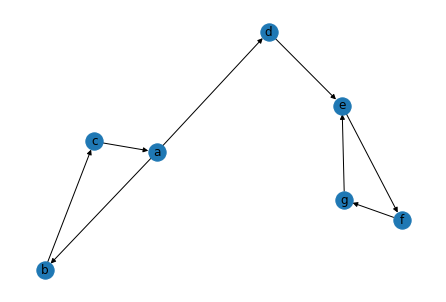

[{'a', 'c', 'b'}, {'d'}, {'e', 'f', 'g'}]
[{'e', 'f', 'g'}, {'d'}, {'a', 'c', 'b'}]


In [4]:
G = nx.DiGraph() 
my_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
G.add_nodes_from(my_list)
G.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'a'), ('a', 'd'), ('d', 'e'), ('e', 'f'), ('f', 'g'), ('g', 'e')])
plot_graph(G)

print(strongly_connected_components(G))
print(list(nx.strongly_connected_components(G)))